In [ ]:
from itertools import chain
from matplotlib import pyplot as plt
import matplotlib as mpl
import numpy as np
import pickle
import pandas as pd
import seaborn as sns
import random

In [2]:
with open('files_full_meta_data.pickle', 'rb') as f:
    full = pickle.load(f)

In [2]:
def show_barplot(path_to_chars_number, title, xlabel='', ylabel=''):
    with open(path_to_chars_number, 'rb') as f:
        nrof_chars = pickle.load(f)
        bins, hist = nrof_chars.values()

        fig = plt.figure(figsize=(15,8))
        h = sns.barplot(x=bins, y=hist, palette="Blues_d")
        plt.xlabel(xlabel)
        plt.ylabel(ylabel)
        plt.title(title)
        plt.show()
        
def make_years_hist():
    with open('movie_years_dict.pickle', 'rb') as f:
        years = pickle.load(f)
    years = years.values()
    iter_years = list(chain(*(years)))
    plt.figure(figsize=(13,8))
    plt.hist(iter_years, bins=list(set(iter_years)) + [2021], density=False, facecolor='g', rwidth=0.8)
    plt.xlabel('Года', fontsize=15)
    plt.ylabel('Количество сценариев', fontsize=15)
    plt.title('Распределение годов написания сценария/выпуска фильма', fontsize=15)
    plt.show()
    
def make_diagram_on(meta_key, full_meta_dict, title ='Распределение', th=100, left_margin=0.4):
    values = {}

    for _, value in full_meta_dict.items():
        if value[meta_key]:
            for genre in value[meta_key]:
                if not genre in values:
                    values[genre]=1
                else:
                    values[genre]+=1
                
    data_names, data_values = list(values.keys()), list(values.values())
    data_names = [data_name + ' ({})'.format(data_values[i]) for i, data_name in enumerate(data_names) if data_values[i]>th]
    data_values = [data_value for data_value in data_values if data_value>th]
    
    
    fig = plt.figure(figsize = (21, 9))
    mpl.rcParams.update({'font.size': 9})
    plt.title(title + ' (%)', fontsize=15)
    xs = range(len(data_names))
    plt.pie(data_values, autopct='%.1f', radius = 1.1,
            labeldistance= 1.1, textprops ={'fontsize':12})
    plt.legend(bbox_to_anchor = (-left_margin, 0., 0, 0),
        loc = 'lower left', labels = data_names, fontsize=12)

def show_table_info(data_frame):
    data_frame_info_dict= {'Column name':[], 'Number of values':[],
                           'Number of unique values':[], 'Example':[]}

    for col in data_frame:
        data_frame_info_dict['Column name'].append(col)
        data_frame_info_dict['Number of values'].append(len(data_frame[col]))
        data_frame_info_dict['Number of unique values'].append(data_frame[col].nunique())
        data_frame_info_dict['Example'].append(data_frame[col][12])
        
    data_frame_info_dict = pd.DataFrame.from_dict(data_frame_info_dict)
    return data_frame_info_dict
    
def show_word_cloud(path_to_word_cloud):
    with open(path_to_word_cloud, 'rb') as f:
        wordcloud = pickle.load(f)
    
    fig = plt.figure(figsize=(15, 15))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

# Scripts\movies meta data analysis

## Extracted meta keys:

('imdbID', 'title', 'akas', 'year', 'metascore', 'imdb user rating', 'number of imdb user votes', 'awards', 'Opening Weekend', 'producers', 'Budget', 'script department', 'production companies','writers' ,'directors','casting directors','cast','countries','age restrict', 'plot', 'plot outline', 'keywords', 'genres',  'taglines' , 'synopsis')

## Quantitative information:
* Number of scripts: 2858
* Number of script annotations: 2612
* Number of movie reviews: 21025
* Number of movies with characters mentioned on IMDB: 2806
* Number of movies with matched annotation characters to IMDB characters: ?

## Visualization:

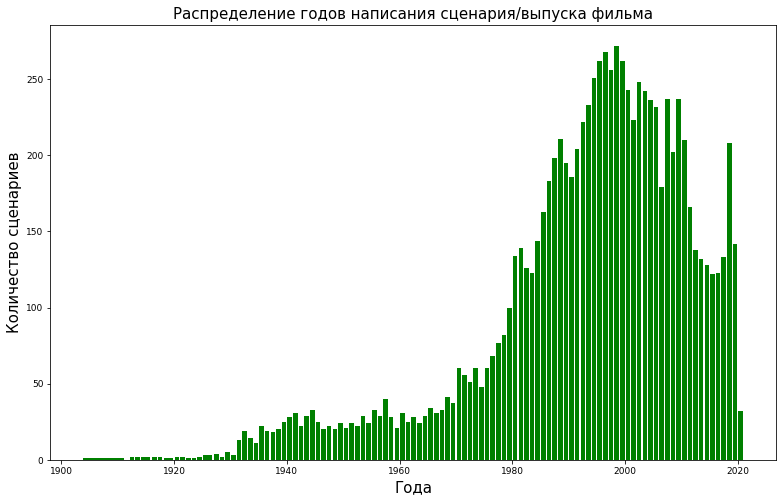

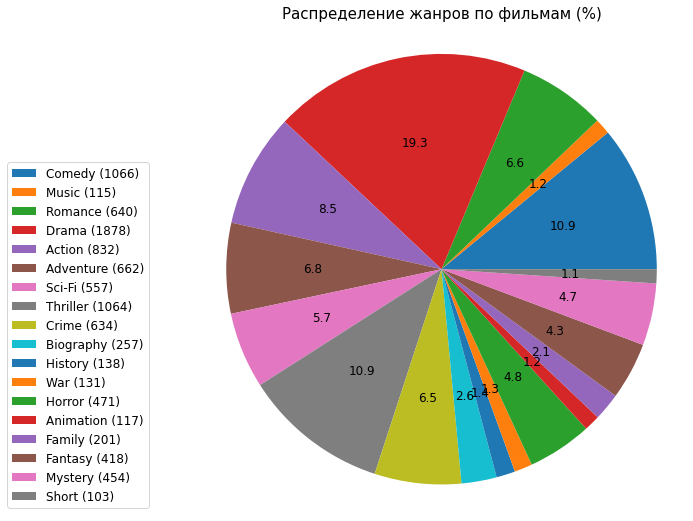

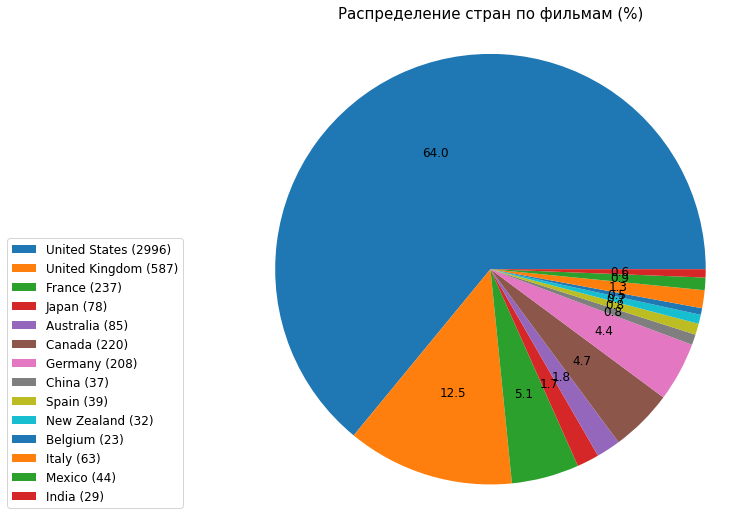

In [40]:
make_years_hist()
make_diagram_on('genres', full, 'Распределение жанров по фильмам')
make_diagram_on('countries', full, 'Распределение стран по фильмам', 20, 0.5)

## Tables info:

### movies_meta_data.csv

In [4]:
meta_data = pd.read_csv('movie_meta_data.csv')
meta_data

,Unnamed: 0,imdbid,title,akas,year,metascore,imdb user rating,number of imdb user votes,awards,opening weekend,...,casting directors,cast,countries,age restrict,plot,plot outline,keywords,genres,taglines,synopsis
0,0,120770,A Night at the Roxbury,"Une nuit au Roxbury (France), Movida en el Rox...",1998,26,6,56537,NaN,United States:,...,Jeff Greenberg,"Will Ferrell, Chris Kattan, Raquel Gardner, Vi...",United States,"Argentina:13, Australia:M, Brazil:14, Canada:P...",Two dim-witted brothers dream of owning their ...,"The Roxbury Guys, Steve and Doug Butabi, want ...","woman-on-top, nightclub, car-accident, 1990s, ...","Comedy, Music, Romance",Score!,NaN
1,1,132512,At First Sight,"Sight Unseen (United States), Premier regard (...",1999,40,6,12922,NaN,United States:,...,"Kerry Barden, Billy Hopkins, Suzanne Smith","Val Kilmer, Mira Sorvino, Kelly McGillis, Stev...",United States,"Argentina:13, Australia:M, Canada:PG::(Alberta...",A blind man has an operation to regain his sig...,First Sight is true to the title from start to...,"visual-agnosia, brother-sister-relationship, r...","Drama, Romance","Only Love Can Bring You To Your Senses., Scien...",NaN
2,2,118661,The Avengers,"Chapeau melon et bottes de cuir (France), Mit ...",1998,12,3,40784,"FMCJ Award 1998, Golden Reel Award 1999, Razzi...","United States: $10,305,957, 16 Aug 1998",...,Susie Figgis,"Ralph Fiennes, Uma Thurman, Sean Connery, Patr...",United States,"Argentina:13, Australia:PG, Brazil:10, Canada:...",Two British Agents team up to stop Sir August ...,"British Ministry Agent John Steed, under direc...","good-versus-evil, heroine, evil-man, villain, ...","Action, Adventure, Sci-Fi, Thriller","Mrs. Peel, we're needed., Extraordinary crimes...",NaN
3,3,215545,Bamboozled,"The Very Black Show (France), It's Showtime (G...",2000,54,6,10373,"Golden Berlin Bear 2001, Black Reel 2001, Imag...",United States:,...,Aisha Coley,"Damon Wayans, Savion Glover, Jada Pinkett Smit...",United States,"Australia:MA, Finland:K-15, France:Tous public...",A frustrated African-American TV writer propos...,"Dark, biting satire of the television industry...","television-industry, african-american, referen...","Comedy, Drama, Music",Starring the great negroe actors,"In a New York City residence, Pierre Delacroix..."
4,4,118715,The Big Lebowski,"El gran Lebowski (Spain), O Grande Lebowski (P...",1998,71,8,724388,"Honorable Mention 1998, ACCA 1998, Golden Berl...","United States: $5,533,844, 08 Mar 1998",...,John S. Lyons,"Jeff Bridges, John Goodman, Julianne Moore, St...","United States, United Kingdom","Argentina:16, Argentina:18::(cable rating), Au...","Jeff ""The Dude"" Lebowski, mistaken for a milli...","When ""the dude"" Lebowski is mistaken for a mil...","rug, nihilism, pornographer, bowling-alley, de...","Comedy, Crime, Sport",Hay quienes tratan de ganarse la vida sin move...,A tumbleweed rolls up a hillside just outside ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2853,2853,114924,While You Were Sleeping,"Coma Guy (United States), L'amour à tout prix ...",1995,67,6,90812,"Golden Globe 1996, American Comedy Award 1996,...",NaN,...,"Cathy Sandrich Gelfond, Amanda Mackey","Sandra Bullock, Bill Pullman, Peter Gallagher,...",United States,"Argentina:Atp, Australia:PG, Brazil:12, Finlan...",A hopelessly romantic Chicago Transit Authorit...,Nursing a secret and hopeless crush on the han...,"loneliness, unconventional-romance, holiday-se...","Comedy, Drama, Romance",A story about love at second sight.,"Sandra Bullock plays Lucy Ellenore Moderatz, a..."
2854,2854,3011894,Wild Tales,"Les Nouveaux Sauvages (France), Wild Tales (Un...",2014,77,8,174075,"Oscar 2015, BAFTA Film Award 2016, Award of th...",NaN,...,Javier Braier,"Darío Grandinetti, María Marull, Mónica Villa,...","Argentina, Spain, France, United Kingdom","Argentina:16, Australia:MA15+, Austria:14, Bra...",Six short stories that explore the extremities...,"The film is divided into six segmen

In [6]:
show_table_info(meta_data)

,Column name,Number of values,Number of unique values,Example
0,imdbid,2858,2858,116191
1,title,2858,2820,Emma
2,akas,2858,2653,"Emma, l'entremetteuse (France), Jane Austens E..."
3,year,2858,103,1996
4,metascore,2858,91,66
5,imdb user rating,2858,69,6.6
6,number of imdb user votes,2858,2537,35646
7,awards,2858,2212,"Oscar 1997, Chlotrudis Award 1997, ALFS Award ..."
8,opening weekend,2858,1041,"United Kingdom: GBP402,499, 13 Sep 1996"
9,producers,2858,2601,"Patrick Cassavetti, Donna Gigliotti, Donna Gre..."


### meta_critic_reviews.csv

In [7]:
metacritic_reviews = pd.read_csv('metacritic_reviews.csv')
metacritic_reviews

,id,text,score,imdbid
0,0,Because so little of what occurs on-screen eit...,4,242998
1,1,"Insufferably boring, culturally hegemonic, and...",5,1335975
2,2,The Roommate has notched an unbelievable achie...,5,1265990
3,3,The only thing about this movie that will haun...,6,160484
4,4,There are legitimate excuses for going to see ...,8,2120120
...,...,...,...,...
21019,21019,Edge of Tomorrow is the ultimate metaphor abou...,100,1631867
21020,21020,I've rarely seen so selfless a collection of p...,100,265086
21021,21021,One of the strongest of all American movies......,100,40897
21022,21022,"The depth, subtlety and wit of Pattinson and D...",100,6723592


In [8]:
show_table_info(metacritic_reviews)

,Column name,Number of values,Number of unique values,Example
0,id,21024,21024,12
1,text,21024,21024,Offers no perverse philosophical conundrums an...
2,score,21024,87,10
3,imdbid,21024,2038,139809


#### metacritic reviews words cloud:

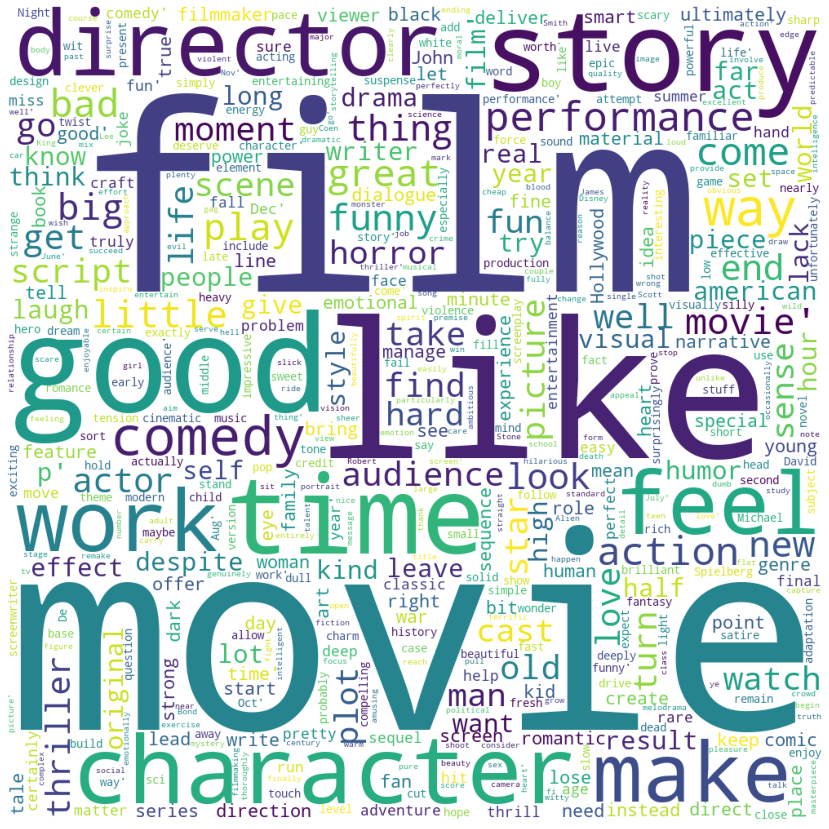

In [4]:
show_word_cloud('reviews_words_cloud.pickle')

## Movie characters info:

### Number of characters per movie:

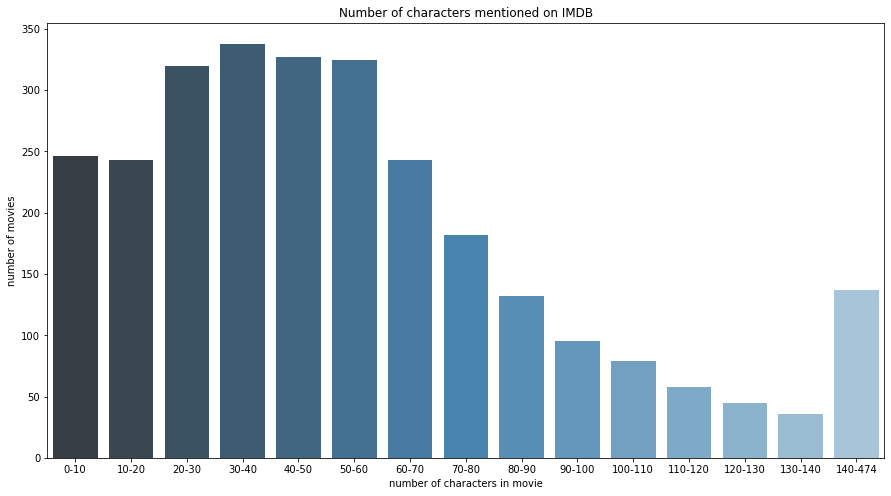

In [5]:
show_barplot('nrof_characters_per_movie_dict.pickle',
                              title='Number of characters mentioned on IMDB',
                              xlabel='number of characters in movie',
                              ylabel='number of movies')

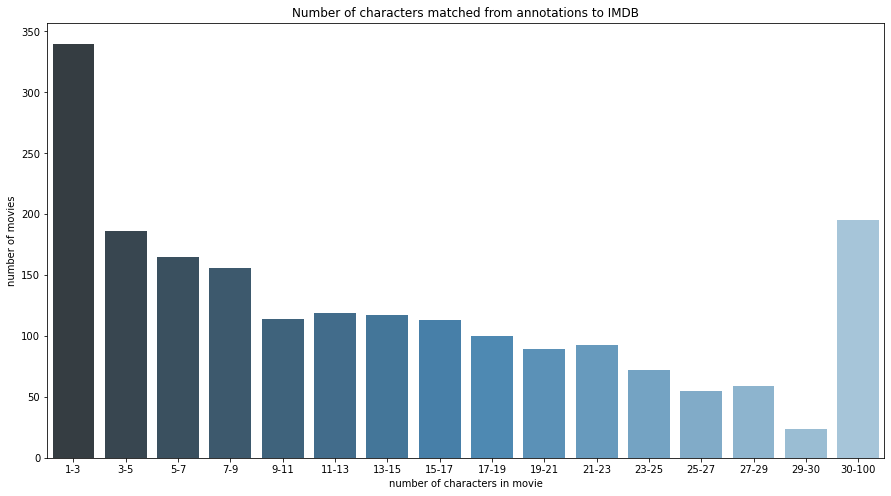

In [6]:
show_barplot('nrof_anno_characters_per_movie_dict.pickle',
                              title='Number of characters matched from annotations to IMDB',
                              xlabel='number of characters in movie',
                              ylabel='number of movies')

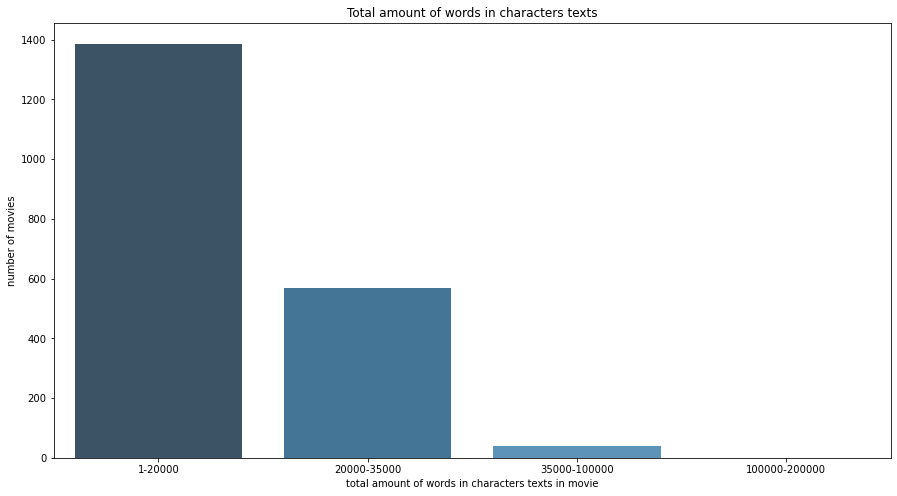

In [7]:
show_barplot('nrof_anno_text_per_movie_dict.pickle',
                              title='Total amount of words in characters texts',
                              xlabel='total amount of words in characters texts in movie',
                              ylabel='number of movies')

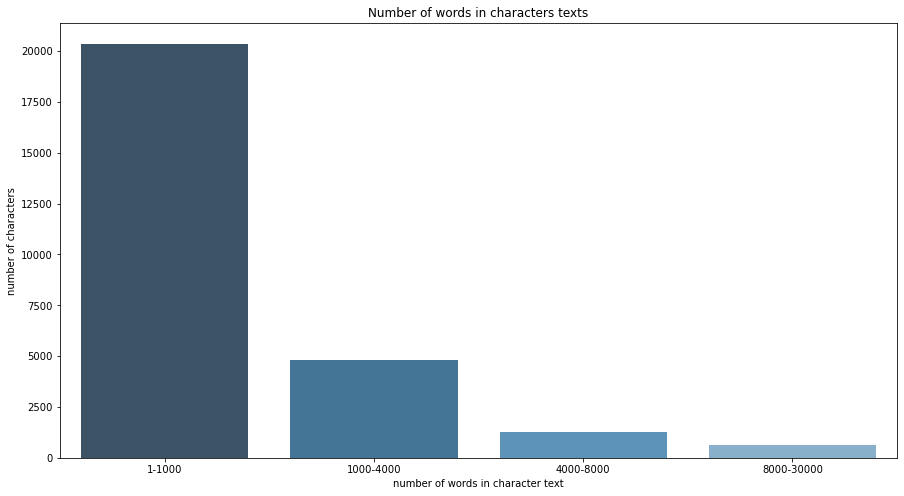

In [8]:
show_barplot('nrof_anno_text_per_char_dict.pickle',
                              title='Number of words in characters texts',
                              xlabel='number of words in character text',
                              ylabel='number of characters')

**Number of characters statistics:**

1. Mentioned on IMDB:
    - mean:       55.6857
    - std:        44.3368
    - min:         1.0000
    - max:       474.0000
2. Matched from annotation to IMDB:
    - mean:       13.5333
    - std:        11.0695
    - min:         1.0000
    - max:        70.0000
 
**Number of words in characters texts statistics:**

1. Total amount of words in characters texts in movie:
    - mean:    14181.6355
    - std:     10612.1355
    - min:         4.0000
    - max:    175408.0000
2. Number of words in character text:
    - mean:     1047.9067
    - std:      1991.6082
    - min:         4.0000
    - max:     28256.0000